[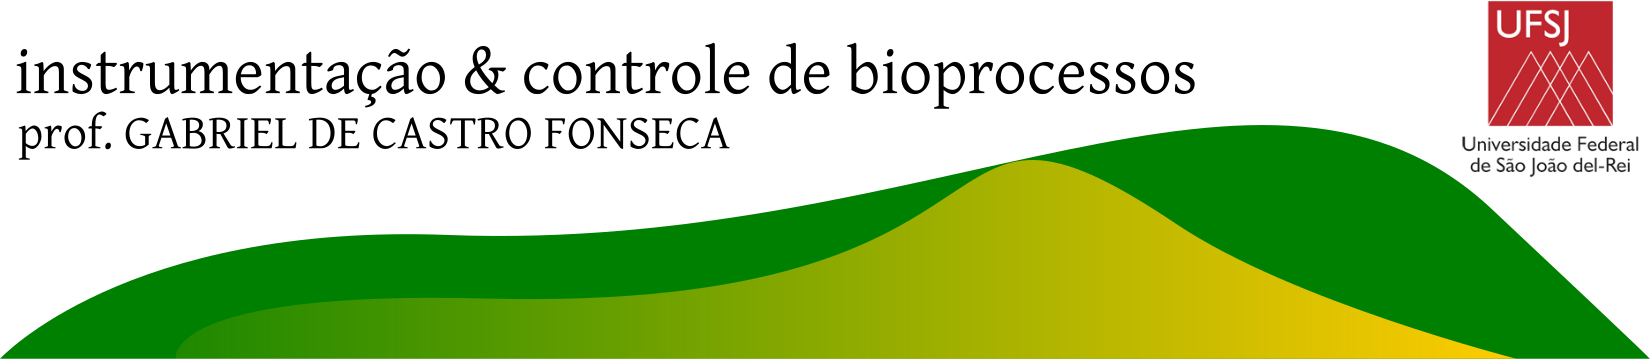](Aulas-Sumário.ipynb)

# Simulação por Diagrama de Blocos de Funções

*Prof. Gabriel de Castro Fonseca (DQBIO/UFSJ)*<br>
*Instrumentação e Controle de Bioprocessos*

Este documento é publicado sob os termos da licença [GNU General Public Licence 3.0](https://www.gnu.org/licenses/gpl-3.0.en.html).

## Transformada de Laplace

[Há algumas aulas](ordem_superior.ipynb) aprendemos um método sistemático para resolver EDO lineares com coeficientes constantes como esta:

\begin{equation}
a_n y^{(n)} + \cdots + a_1 \dot y + a_0 y = b u(t)
\end{equation}

Nossa abordagem consiste em encontrar uma solução homogênea resolvendo para $u(t) = 0$ e uma solução particular pelo método dos coeficientes indeterminados.

A grande maioria dos livros de Controle de Processos, por outro lado, usa um método diferente baseado em Transformadas de Laplace, uma transformada integral definida como

\begin{equation}
    \mathcal{L}[f(t)] = \int_0^\infty f(t) e^{-st} dt = F(s)
\end{equation}

Algumas Transformadas de Laplace para funções comuns em Controle de Processos estão mostradas na tabela abaixo.

| $f(t) = \mathcal{L}^{-1}[F(s)]$ |$\phantom{aaa}$| $ F(s) = \mathcal{L}[f(t)]$ |
| :---: | --- | :---: |
| $a\cdot\mathbf{1}^+(t)$ | $\phantom{aaa}$ | $\dfrac{a}{s}$ |
| $a\cdot\delta(t)$ | $\phantom{aaa}$ | $a$ |
| $e^{-at}$ | $\phantom{aaa}$ | $\dfrac{1}{s+a}$ |
| $f(t-\theta)$ | $\phantom{aaa}$ | $F(s)e^{-s\theta}$ |
| $\dfrac{df}{dt}$ | $\phantom{aaa}$ | $sF(s)-f(0)$ |



A Transformada de Laplace é útil para resolver EDO lineares com coeficientes constantes porque, se $y(t)$ for uma variável desvio (o que implica dizer que todas as suas condições iniciais são nulas, $y(0) = \dot y(0) = \cdots = y^{(n-1)}(0) = 0)$, então a transformada da EDO se torna

\begin{gather*}
    \mathcal{L}[a_n y^{(n)} + \cdots + a_1 \dot y + a_0 y] = \mathcal{L}[b u(t)] \\
    (a_n s^n + \cdots + a_1 s + a_0)Y(s) = b U(s) \\
    Y(s) = \frac{bU(s)}{a_n s^n + \cdots + a_1 s + a_0}
\end{gather*}

Ou seja, a equação diferencial se transforma em uma equação algébrica. Observe que $a_n s^n + \cdots + a_1 s + a_0$ é o já conhecido polinômio característico.

A solução da EDO por transformada de Laplace passa pelas seguintes etapas:
1. Fatoração do polinômio no denominador.
2. Decomposição em frações parciais
3. Invertendo a Transformada de Laplace

### Exemplo

Vamos resolver novamente a equação diferencial $\quad 36\ddot y + 13\dot y + y = 10 \cdot \mathbf{1}^+(t)\;, \quad$ vista [na última aula](segunda_ordem.ipynb).

\begin{gather*}
    \mathcal{L}[36\ddot y + 13\dot y + y] = \mathcal{L}[10 \cdot \mathbf{1}^+(t)] \\
    (36 s^2 + 13 s + 1)Y(s) = \frac{10}{s} \\
    Y(s) = \frac{10}{s(36 s^2 + 13 s + 1)} \\
    Y(s) = \frac{10}{s(4s+1)(9s+1)}
\end{gather*}

A decomposição em frações parciais consiste em dividir a fração em partes indivisíveis. Esse processo é tedioso de fazer à mão, por isso vamos usar o Sympy.

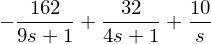

In [7]:
import sympy as sym # importação do pacote de matemática simbólica
sym.init_printing() # imprime as fórmulas calculadas com formato LaTeX

s = sym.symbols('s') # definição da variável simbólica s
Y = 10/( s*(4*s+1)*(9*s+1) ) # definição da fração
sym.apart(Y) # a função apart() decompõe em frações parciais

Uma vez separadas as frações, escrevemos cada termo em uma forma que possa ser invertida através de uma tabela de transformadas de Laplace.
\begin{gather*}
    Y(s) = - \frac{162}{9 s + 1} + \frac{32}{4 s + 1} + \frac{10}{s} \\
    Y(s) = - \frac{18}{s + \frac{1}{9}} + \frac{8}{s + \frac{1}{4}} + \frac{10}{s} \\[1mm]
    \mathcal{L^{-1}}[Y(s)] = \mathcal{L^{-1}}\left[ - \frac{18}{s + \frac{1}{9}} + \frac{8}{s + \frac{1}{4}} + \frac{10}{s} \right] \\[2mm]
    y(t) = -18 e^{-t/9} + 8 e^{-t/4} + 10
\end{gather*}

#### Desvantagens da Transformada de Laplace

* Você provavelmente vai precisar de uma tabela.
* A decomposição em frações parciais pode ser trabalhosa.
* Mais abstrato que resolver a EDO diretamente.

#### Vantagens da Transformada de Laplace

* A resposta ao impulso pode ser encontrada diretamente, sem necessidade de conhecer a resposta ao degrau.
* É o método mais usado nos livros de Controle de Processos.
* É a base para a definição do importante conceito de **função de transferência**.

## Função de Transferência

Define-se a função de transferência $G(s)$ de um sistema como a razão entre as Transformadas de Laplace da resposta e do estímulo. Para a equação diferencial $\quad a_n y^{(n)} + \cdots + a_1 \dot y + a_0 y = b u(t)\;$:

\begin{equation}
    \frac{Y(s)}{U(s)} = \frac{b}{a_n s^n + \cdots + a_1 s + a_0} = G(s)
\end{equation}

Outra forma de definir a função de transferência é como um operador diferencial. Redefinindo $ s \equiv \frac{d}{dt} $, podemos representar a EDO como

\begin{gather*}
    (a_n s^n + \cdots + a_1 s + a_0) y(t) = b u(t) \\[2mm]
    \frac{y(t)}{u(t)} = \frac{b}{a_n s^n + \cdots + a_1 s + a_0} = G(s)
\end{gather*}

As funções de transferência dos sistemas de primeira e segunda ordem que estudamos anteriormente estão informadas na tabela

| Sistema | Equação diferencial ordinária | Função de transferência |
| --- | :---: | :---: |
| 1ª ordem, integrador | $\dot y = k u$ | $\dfrac{k}{s}$ |
| 1ª ordem, capacitivo | $\tau \dot y + y = K u$ | $\dfrac{K}{\tau s + 1}$ |
| 2ª ordem | $\tau^2 \ddot y + 2\zeta \tau \dot y + y = Ku$ | $\dfrac{K}{\tau^2s^2+2\zeta\tau s + 1}$ |

Funções de transferência são úteis porque nos permitem escrever problemas na forma de diagramas de blocos de funções. Esses diagramas podem ser usados para simular ou mesmo programar controladores.

Um bloco de função é uma caixa que relaciona um número de variáveis de entrada a um número de variáveis de saída. Essa relação pode ser expressa por

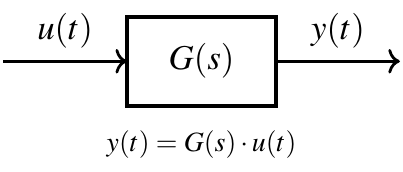

Até aqui temos usado Python para simular sistemas dinâmicos. Agora vamos introduzir a outra linguagem oficial do nosso curso: Xcos.

## Simulação por Diagramas de Blocos com Xcos

Xcos (outrora conhecido como Scicos) não é um programa independente, mas sim um módulo do Scilab, pacote de programação numérica que também pode ser usado como alternativa ao Python. Mas diferentemente do Scilab e do Python, o Xcos é uma linguagem de programação gráfica que usa o conceito de blocos de função para simular sistemas dinâmicos. É uma alternativa gratuita ao Simulink, um *software* similar que é um módulo do Matlab.

O vídeo abaixo, do [professor Cleiton Vaz](https://www.youtube.com/channel/UCzk317YbvDRIPR4IGDGAztg), ensina a montar um diagrama de blocos para simular um sistema dinâmico no Xcos a partir de sua função de transferência.

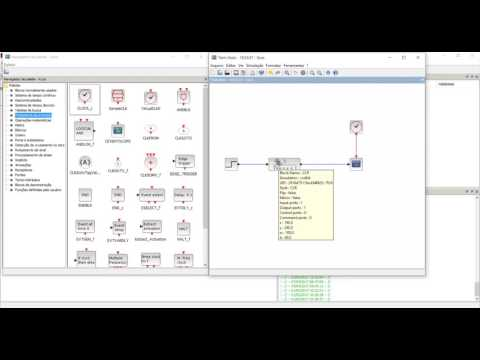

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo("woLbGbY5i28",width=746,height=400)

### Exemplo: Pêndulo não linear e pêndulo linearizado

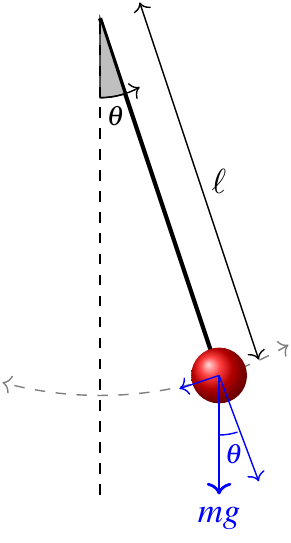

A figura representa a oscilação de um pêndulo. Na direção radial a posição do pêndulo é constante. Na direção angular o balanço de forças pode ser representado por

\begin{equation}
    m a = - c v - mg {\rm sen}\theta + F(t)
\end{equation}

* $m$ é a massa da bola na ponta do pêndulo. 
* $g$ é a aceleração da gravidade.
* $\ell$ é o comprimento da corda. Sua massa pode ser desprezadas.
* $\theta$ é o ângulo entre a corda e a posição inicial de equilíbrio $\theta^* = 0$.
* $a$ é a aceleração do pêndulo.
* $v$ é a velocidade do pêndulo.
* $c$ é uma constante relacionada a forças dissipativas
* $F(t)$ é uma força arbitrária aplicada sobre o pêndulo, por exemplo, um peteleco.

Substituindo $a = \ell \ddot \theta$ e $v = \ell \dot \theta$ podemos escrever o balanço de forças na forma de uma equação diferencial não linear.

\begin{equation}
    \frac{\ell}{g} \ddot \theta + \frac{c \ell}{mg} \dot \theta + {\rm sen}\theta = \frac{F(t)}{mg}
\end{equation}

Essa equação pode ser linearizada facilmente considerando que, para pequenas oscilações, $\rm sen\theta \approx \theta$:

In [3]:
from numpy import sin as sen

for θ in [0.001, 0.01, 0.1,1]: # θ é medido em radianos
    print(f"sen({θ})={sen(θ):9.7f}")

sen(0.001)=0.0010000
sen(0.01)=0.0099998
sen(0.1)=0.0998334
sen(1)=0.8414710


Assim, na forma linearizada a EDO se torna
\begin{gather*}
    \frac{\ell}{g} \ddot \theta + \frac{c \ell}{mg} \dot \theta + \theta = \frac{1}{mg}F(t) \\
    \tau^2\ddot y + 2\zeta \tau \dot y + y = K u
\end{gather*}

Vamos supor que os valores dos parâmetros sejam tais que $\tau^2=1$, $\;\;2\zeta\tau = 0,5\;$ e $\; K=0,1$. Nesse caso a função de transferência do problema seria

$$
    \frac{y(t)}{u(t)} = \frac{0,1}{s^2 + 0,5 s + 1}
$$

A simulação do problema linearizado no Xcos é trivial. Na figura abaixo está mostrado o diagrama de blocos do sistema considerando um estímulo pulso (Fontes >> PULSE_SC), o que pode ser interpretado como o caso em que o pêndulo é posto em movimento por um peteleco. 

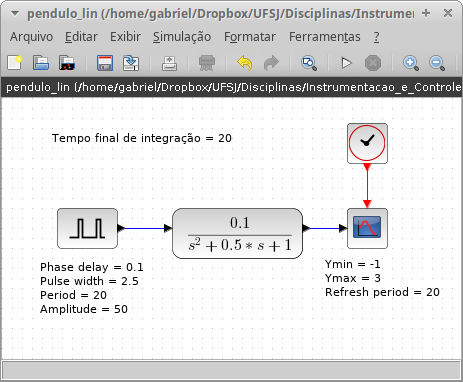

O Xcos também nos permite simular o problema não linear, embora isso seja um pouco mais complicado porque equações diferenciais não lineares não têm função de transferência. Precisamos de outra maneira representar graficamente estas EDO usando blocos de funções mais elementares. Isso pode ser feito através do método dos blocos integradores. 

Blocos integradores, como diz o nome, são blocos que calculam integrais. No Xcos há duas opções: um bloco marcado como $\boxed{\;\;\int\;\;}$ e outro marcado como $\boxed{\;\;\dfrac{1}{s}\;\;}$ (lembre-se que definimos $s$ como sendo equivalente ao operador diferencial, por analogia $\frac{1}{s}$ equivale à integral).

O primeiro passo é encadear um número de blocos integrais igual à ordem da equação diferencial. No nosso caso, onde a EDO é de segunda ordem,

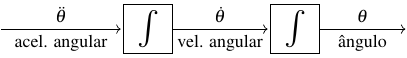

Naturalmente, após passar por cada bloco, a variável resposta é integrada. 

O segundo passo para desenhar o diagrama de blocos é reescrever a EDO que desejamos representar isolando a maior derivada em um dos lados da equação. Para os mesmos valores de parâmetros do caso linearizado,

$$
    \ddot \theta = 0,1 F(t) - 0,5 \dot \theta - {\rm sen}\theta 
$$

Finalmente desenhamos um bloco de somatória à esquerda da nossa maior derivada e conectamos cada variável a esse bloco depois que elas passarem por operações adequadas, conforme mostra a figura.

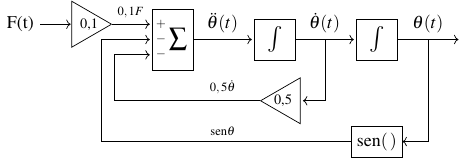

Os blocos integradores no Xcos se encontram na paleta "Sistema de tempo contínuo". Usamos também os blocos BIG_SUM ou SUMMATION para representar a somatória, o bloco GAIN_f para representar o ganho (multiplicação por uma constante) e o bloco SINBLK_f para a função seno. Todos eles estão localizados na paleta "Operações matemáticas". As configurações dos blocos e da simulação estão escritas sobre a figura.

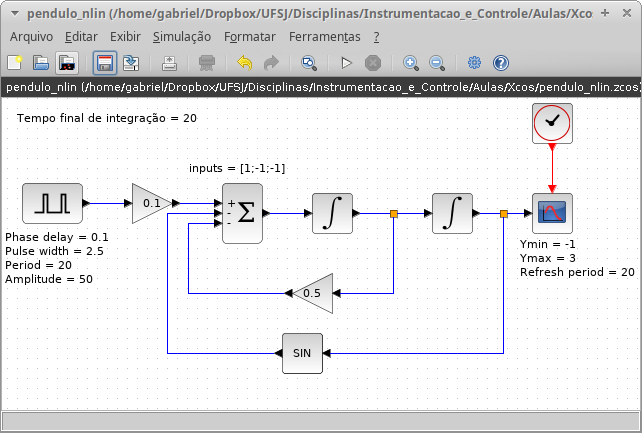

É possível condensar o modelo do pêndulo em um único *superbloco*. Para isso selecione com o botão direito todo o diagrama, com exceção do estímulo e do gráfico; clique com o botão direito e selecione "Selection to superblock".

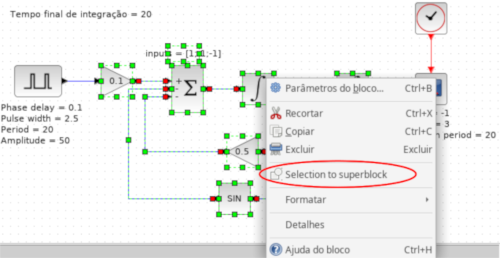

Usando o superbloco, vamos agora comparar a resposta não linear à linear. Para isso basta refazer o modelo linear no mesmo diagrama e juntar as duas resposta com o multiplexador (MUX, na paleta "Roteamento de sinal") antes de passá-las para o gráfico.

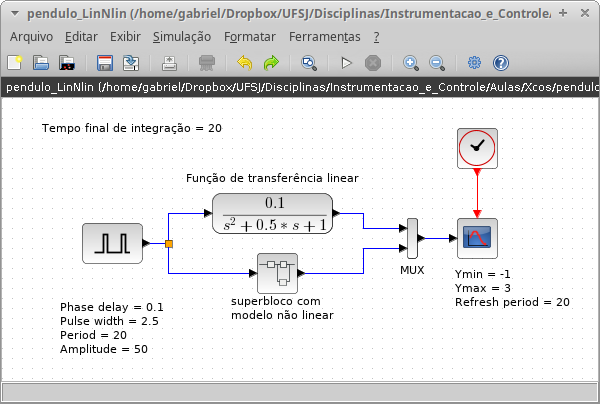

Use os gráficos interativos abaixo para comparar com os resultados de sua simulação no Xcos.

O gráfico da esquerda mostra o ângulo de oscilação em função do tempo e é um gráfico semelhante ao que você vai obter no Xcos. O gráfico da direita é um plano de fases que mostra a relação entre ângulo e velocidade de oscilação para os pêndulos linearizado e não linear.

In [7]:
%matplotlib inline

# Carregamento de pacotes
import numpy as np
import scipy as sp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Definição das equações diferenciais
def plin(y,t,F):
    """
    Pêndulo linearizado.
    """
    θ, dθ = y  # y tem dois componente, o primeiro será θ e o segundo sua derivada
    d2θ = - 0.5*dθ - θ + ( 0.1*F if t <= 0.5 else 0) # cria pulso igual ao simulado no Xcos
    return dθ, d2θ

def pnlin(y,t,F):
    """
    Pêndulo não linear
    """
    θ, dθ = y
    d2θ = - 0.5*dθ - np.sin(θ) + ( 0.1*F if t <= 0.5 else 0)
    return dθ, d2θ

# Funçao principal
def principal(F):
    # Solução das EDO
    t = np.arange(0,20,0.02)
    θo = 0, 0
    θlin = odeint(plin, θo, t, args = (F,))
    θnlin = odeint(pnlin, θo, t, args = (F,))
    graf(t,θlin,θnlin)

def graf(t,θlin,θnlin):
    plt.rcParams["figure.figsize"]=[15,6]
    plt.subplot(121)
    plt.plot(t,θlin[:,0], label = "linearizado")
    plt.plot(t,θnlin[:,0], label = "não linear")
    plt.ylabel(r"Ângulo do pêndulo, $\theta$")
    plt.xlabel(r"Tempo, $t$")
    plt.title("Resposta ao impulso.")
    plt.grid();
    plt.legend(loc="lower right")

    plt.subplot(122)
    plt.xlabel(r"Ângulo do pêndulo, $\theta$")
    plt.ylabel(r"Velocidade angular do pêndulo, $\dot \theta$")
    plt.title("Plano de fases.")
    plt.plot(θlin[:,0],θlin[:,1], label = "linearizado")
    plt.plot(θnlin[:,0],θnlin[:,1], label = "não linear")
    plt.grid()
    plt.legend(loc="best")    
    
F_widget = widgets.FloatSlider(min=0, max=150, step=5, value=0, description = r'$F$')

print("\n\tForça aplicada (pulso).")
w = widgets.interact(principal, F=F_widget)
w.widget.children[-1].layout.height = '450px' # mantém tamanho da área de resposta fixo
display(w)


	Força aplicada (pulso).


interactive(children=(FloatSlider(value=0.0, description='$F$', max=150.0, step=5.0), Output()), _dom_classes=…

<function __main__.principal(F)>

Para pequenas estímulos fracos (pequenas oscilações), o comportamento dos sistemas linear e não linear são muito semelhantes. Após ser perturbado por um pulso, o pêndulo oscila em torno da posição de equilíbrio original $\theta^* = 0$.

Para estímulos fortes, por outro lado, o pêndulo não linerar e o linearizado passam a ter comportamentos completamente diferentes. O sistema não linear chega a posições de equilíbrio diferentes em $\theta  = 2\pi$ e $\theta = 4\pi$. Isso acontece porque o modelo não linear prevê a possibilidade de o pêndulo dar uma volta completa em torno do eixo de rotação. O modelo não linearizado não prevê isso, e inclusive pode-se observar em alguns gráficos que o pêndulo linear oscila até ângulos maiores que $\pi$ (posição vertical) e então ele volta até a posição inicial sem completar a rotação, o que é fisicamente absurdo.

Reforçamos a conclusão tirada na [aula sobre modelagem de sistemas dinâmicos](tanque.ipynb) de que a linearização pode ser uma técnica útil para representar sistemas dinâmicos, mas apenas quando eles não se desviam excessivamente do ponto de linearização. Caso contrário, o comportamento do sistema real pode ser muito diferente do previsto pelo sistema linear.

## Bibliografia

* C.A. Kluever (2018). Sistemas Dinâmicos: Modelagem, Simulação e Controle. LTC. Capítulo 6.
* B.W. Bequette. (2003). Process Control: Modeling, Design and Simulation. Edgard Blücher. Módulo 2.
* C.A. Smith, A. Corripio (2008). Princípios e Prática do Controle Automático de Processo. 3 a ed. LTC. Capítulo 13.
* W.H. Kwong (2013) [Introdução ao Scilab/Scicos](http://livresaber.sead.ufscar.br:8080/jspui/bitstream/123456789/2763/1/TS_Wu_Scilab_Scicos.pdf). EdUFSCar.
* J.C. Kantor (2019). [CBE 30338 Chemical Process Control](http://jckantor.github.io/CBE30338/). Capítulo 3.